In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# **1. Decomposição em Valores Singulares (SVD)**

---

A decomposição SVD de uma matriz $A_{m×n}$ tem a forma

$$A = U ΣV^T$$

em que $U$ é uma matriz $m × n$ ortogonal, $V$ uma matriz tamb em ortogonal com dimensão $n × n$ e $Σ$ uma matriz
diagonal $m × n$ com entradas

$$ σ_{ij} = \begin{cases} 0, \quad i \neq j\\
 0 \leq σ_i, \quad i = j\end{cases}$$


Esses valores $σ_i$ são chamados de valores singulares de $A$ e geralmente são ordenados tais que $σ_{i−1} ≥ σ_i, i =
2, · · · , min{m, n}$. Já as colunas de $U$ e $V$ s ao os vetores singulares a esquerda e a direta, respectivamente.
Esta decomposição está diretamente ligada a algoritmos para calcular autovalores e autovetores de matrizes. Os
valores singulares de $A$ são as raízes quadradas dos autovalores de $A^T A$ e as colunas $U$ e $V$ são os autovetores
ortonormais de $AA^T$ e $A^T A$ respectivamente.
Ainda, para uma matriz sim ́etrica $B_{n×n}$, a decomposição $QR$ pode ser usada para calcular todos os seus
autovalores e autovetores usado sucessivas decomposições at ́e que se obtenha uma matriz diagonal (ou muito
próxima de uma diagonal). O processo envolvido é

1. $B_1 = B$ decompõe-se a matriz $B_1 = Q_1R$
2. $B_2 = R_1Q_1$ decompõe-se a matriz $B_2 = Q_2R_2$
3. $B_3 = R_2Q_2$ e então $B_3 = Q_3R_3$
4. Repete-se essas iterações até $B_k = R_{k−1}Q_{k−1}$

como trata-se de um processo iterativo, é importante escolher um bom critério de parada. Dentre os critérios
mais usados, pode-se limitar o número de iterações $k$ por um máximo de iterações $k_{max}$, verificar se os elementos
da matriz fora da diagonal estão tão próximos de zero quanto se queira usando uma tolerância

$$max_{i<j}{|(b_{i)})|}< ε $$

ou verificar se $off(B) < ε $

$$off(B) = \sqrt{||B||²_F - \sum^n_{i=1}b_{ii}^2}$$

em que $V = Q_1Q_2 · · · Q_{k−1}$, ou seja, $B$ e $B_k$ são matrizes semelhantes e possuem os mesmos autovalores. Além
disso, $B_k$, como dito anteriormente, converge para uma matriz diagonal, ou seja, os elementos da diagonal
de $B_k$ fornecem uma aproximação para os autovalores de $B$ e as colunas das matriz $V = Q_1Q_2 · · · Q_{k−1}$ são
aproximações dos respectivos autovetores. O método de Francis pode ser usado para obter a decomposição SVD
de uma matriz qualquer $A_{m×n}$ ao ser aplicado nas matrizes sim étricas $AA_T$ e $A_T A$, uma vez que

* $AAT = (U ΣV^T )(U ΣV^T )^T = U Σ(V^t V )Σ^T = U Σ^2U^T$ e
* $A^T A = (U ΣV^T )^T (U Σ^T ) = V Σ(U^T U )Σ^T = V Σ^2V^T$.

**a)** Escreva um código implementando o método de Francis usando a função `numpy.linalg.qr` para obter as
decomposiçõees $QR$ necessárias.

In [ ]:
def metodoFrancis(B, epsilon=1e-8, kmax=100):
  n, _ = B.shape # Dimensões da matriz
  V = np.eye(n)  # Inicia a matriz identidade com dimensões de B

  for k in range(kmax):
    # Decomposição QR: Q = matriz ortogonal, R =  matriz triangular superior
    Q, R = np.linalg.qr(B)

    B = R @ Q # Atualiza B, realizando uma iteração do método QR
    V = V @ Q # Atualiza V, acumulando as transformações ortogonais

    # Calcula a norma de Frobenius de B
    off = np.linalg.norm(B) - np.sum(np.abs(np.diag(B)))

    if off < epsilon:
      break

  return B, V

**b)** Usando a rotina implementada para o método de Francis, escreva um código que retorne a decomposição
$SVD$ de uma matriz qualquer $A_{m×n}$.

In [ ]:
def SVD(A, epsilon=1e-8, kmax=100):
    m, n = A.shape # Dimensões da matriz

    # Verifica se as condições para a SVD são cumpridas
    if m < n:
        raise ValueError('SVD: m >= n')

    # Calcula as matrizes B e V,
    B, V = metodoFrancis(A.T @ A, epsilon, kmax)

    # Calcula os valores singulares
    valoresSingulares = np.sqrt(np.abs(np.diag(B)))

    # Ordenas os valores singulares, reorganizando as colunas da matriz V
    indicesOrdenados = np.argsort(valoresSingulares)[::-1]
    valoresSingulares = valoresSingulares[indicesOrdenados]
    V = V[:, indicesOrdenados]

    V = V[:, :n] # Selecionas as n primeiras colunas de V

    U = A @ V / valoresSingulares # Calcula a matriz U

    return U, valoresSingulares, V.T

In [ ]:
# Checando a SVD
A = np.array([[5.2, 3.56], [1.795, 14.67]])
U, S, VT = SVD(A)

# Podemos perceber que a recomposição está correta
print(U, '\n\n',  S, '\n\n', VT, '\n')
print(U @ np.diag(S) @ VT)

[[-0.40665257 -0.32629879]
 [-0.91358289  0.94526668]] 

 [14.40952892  7.10703885] 

 [[-0.55936982 -0.82891821]
 [-0.82891821  0.55936982]] 

[[ 5.2    3.56 ]
 [ 1.795 14.67 ]]


**c)** Podemos armazenar uma imagem em uma matriz $A_{m×n}$. Toda imagem consiste em um conjunto de pixels
que são os blocos de construção dessa imagem. Cada pixel representa a cor ou a intensidade da luz em um local
especéfico na imagem. Em uma imagem em escala de cinza em formato PNG, cada pixel tem um valor entre $0$ e
$1$, em que $0$ corresponde ao preto e $1$ corresponde ao branco. Assim, uma imagem em escala de cinza com $m × n$
pixels pode ser armazenada em uma matriz $m × n$ com valores entre 0 e 1. Use a função `imread()` da biblioteca
`Matplotlib` do Python para carregar uma imagem de uma foto pessoal em escala de cinza. Depois, use as
decomposições SVD `numpy.linalg.svd` e a implementada no  item 2) para comprimir a imagem, representando-a
por $k (k < min(m, n))$ valores singulares, isto  é, troque a matriz A por $A_k = U [:, : k] ∗ Σ[: k, : k] ∗ V T [: k, :]$.
Plote a imagem original e a imagem $50\%$ e $70\%$ comprimida e compare os resultados. Para tal, use a fun ̧cão
`imshow()`, também da biblioteca `Matplotlib`.

SVD


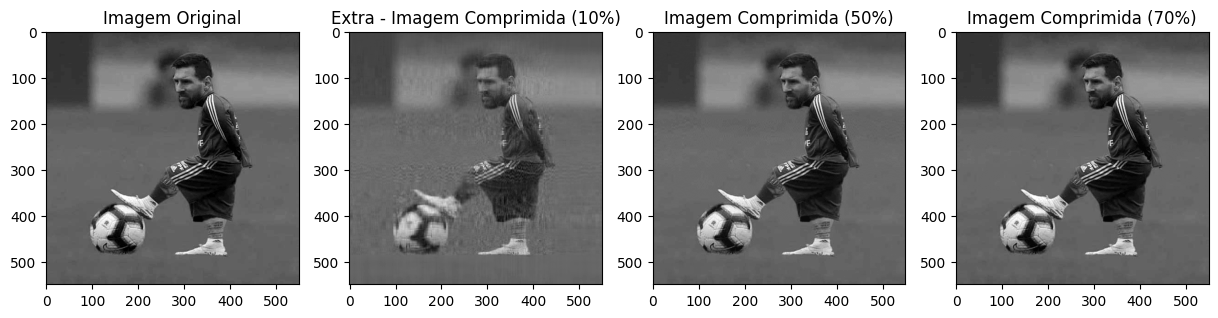

np.linalg.svd


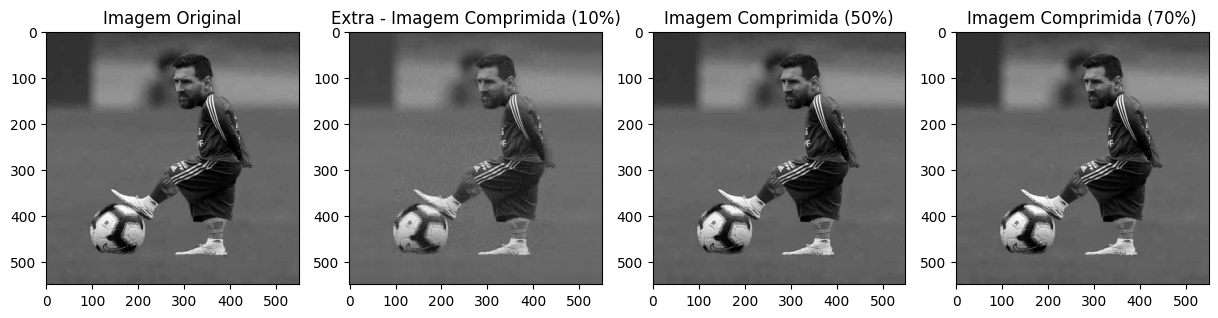

In [ ]:
# Recebe como parâmetro a função a ser utilizada
def plot1c(function):
  img = plt.imread('/content/messiChiquito.png') # Imagem

  # Calcula a média dos canais de cores e transforma para matriz
  img = np.mean(img, axis=2)

  # Aplica a decomposição SVD
  U, sigma, VT = function(img)

  # Calcula os valores para a menor dimensão da matriz
  k10 = int(min(img.shape) * 0.1)  # 10%
  k50 = int(min(img.shape) * 0.5)  # 50%
  k70 = int(min(img.shape) * 0.7)  # 70%

  # Reconstrução da imagem comprimida com as k50 e k70 primeiras colunas
  img10 = U[:, :k10] @ np.diag(sigma[:k10]) @ VT[:k10, :]
  img50 = U[:, :k50] @ np.diag(sigma[:k50]) @ VT[:k50, :]
  img70 = U[:, :k70] @ np.diag(sigma[:k70]) @ VT[:k70, :]

  # Plotagem
  plt.figure(figsize=(15, 8))

  plt.subplot(1, 4, 1)
  plt.imshow(img, cmap='gray')
  plt.title('Imagem Original')

  plt.subplot(1, 4, 2)
  plt.imshow(img10, cmap='gray')
  plt.title('Extra - Imagem Comprimida (10%)')

  plt.subplot(1, 4, 3)
  plt.imshow(img50, cmap='gray')
  plt.title('Imagem Comprimida (50%)')

  plt.subplot(1, 4, 4)
  plt.imshow(img70, cmap='gray')
  plt.title('Imagem Comprimida (70%)')

  plt.show()

print('SVD')
plot1c(SVD)
print('np.linalg.svd')
plot1c(np.linalg.svd)

Por fim, podemos concluir que as imagens comprimidas em $50\%$ e $70\%$ da imagem original não possuem diferenças visíveis. Porém, para o caso de $10\%$, vale salientar, que a função `np.linalg.np` obteve um desempenho superior em relação a função `SVD` desenvolvida nesse exercício. Entretando, como nosso objetivo é comparar para os valores de $50\%$ e $70\%$, entendemos elas possuem desempenhos semelhantes, mesmo que isso não seja veridico para todos os casos.

# **2. Interpolação**

---

Para a função
$$f(t) = \cfrac{1}{1 + 25t^2}$$
no intervalo $[-1, 1]$ faça:

In [ ]:
f = lambda x : 1 / (1 + 25 * x**2) # Definição da função

**a)** Implemente a interpolação de Lagrange e de Newton.

<h2><b>Forma de Lagrange<b/><h2/>

---

A forma de Lagrange para o polinômio de interpolação $P_n(x)$ nos pontos $(x_0, y_0)$, ..., $(x_n, y_n)$ é dado por:


$$P_n(x) = y_0 l_0(x) + y_1 l_1(x) + ... + y_n l_n(x) + \sum^n_{k=0}y_k l_k(x)$$

onde $l_k(x) \in P_n$ são polinômios que dependem apenas de $x_0$, ... $x_n$.



In [ ]:
def formaLagrange(xi, yi, x):
  n = len(xi) # Número de pontos de interpolação
  m = len(x)  # Número de valores de x para encontrar y

  P = np.ones((n,m)) # Matriz de coeficientes de lagrange

  for i in range(n): # Intera pelos pontos de interpolação
    for j in range(n): # Intera pelos pontos de interpolação novamente
      if(i != j): # Evita caos em i == j
        # Calcula o coeficiente de Lagranfe para cada ponto
        P[i, :] = (P[i, :] * (x - xi[j])) / (xi[i] - xi[j])

  y = np.dot(yi, P) # Produto escalar entre os valores de Lagrange e y

  return y

<h2><b>Forma de Newton<b/><h2/>

---

A forma de Newton para $P_n(x)$ é dada de maneira diferente:

$$P_n(x) = α_0 + α_1(x-x_0) + α_2(x-x_0)(x-x_1) + ... + α_n(x-x_0)(x-x_1) ... (x-x_{n-1})$$

Cada coeficiente $a_k$ é determinada por uma diferença dividida de ordem $k$:

$$a_k = f[x_0, x_1, ..., x_k], \quad k=0,1, ..., n$$

In [ ]:
def formaNewton(xi, yi, x):
  n = len(xi) # Número de pontos de interpolação
  m = len(x)  # Número de valores de x para encontrar y

  N = np.ones((n, m)) # Matriz de diferenças divididas, inicializadas em 1s
  D = np.zeros((n, n)) # Matriz de diferenças divididas, inicializadas em 0s
  D[:, 0] = yi # A primeira coluna é preenchida com valores de y

  for j in range(n-1): # Intera sobre as colunas restantes de D
    for i in range(n-j-1): # Intera sobre as linhas correspondentes a cada coluna
      # Cálculo das diferenças divididas de Newton
      D[i, j+1] = (D[i+1, j] - D[i, j]) / (xi[i+j+1] - xi[i])

  for i in np.arange(1, n):
    # Cálcula das potências
    N[i,:] = N[i-1, :] * (x - xi[i-1])

  # Produto escalar entre a primeira linha de D e as linhas de N
  y = np.dot(D[0, :], N)

  return y

<h2><b>Função utilizada para b e c<b/><h2/>

---

Realiza as interpolações de Newton e Lagrange, assim como dois tipos de plotagem para a análise do resultado.

In [ ]:
def ex2BC(n):
  # Intervalo [-1, 1]
  a, b = -1, 1

  # Pontos igualmente espaçados
  x = np.linspace(a, b, num=n)
  y = f(x)

  # Pontos para a interpolação
  xi = np.linspace(a, b, 100)

  # Interpolações
  yiLagrange = formaLagrange(x, y, xi)
  yiNewton = formaNewton(x, y, xi)

  # Plot dos resultados
  plt.figure(figsize=(16, 5))

  plt.subplot(1, 2, 1)
  plt.plot(xi, f(xi), label='Função Exata')
  plt.plot(xi, yiLagrange, label='Interpolação de Lagrange')
  plt.plot(xi, yiNewton, label='Interpolação de Newton')
  plt.scatter(x, y, color='red', label='Pontos')
  plt.legend()
  plt.xlabel('t')
  plt.ylabel('f(t)')
  plt.title('Interpolação de Lagrange e Newton (%s pontos)' %n)
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.plot(xi, f(xi), label='Função Exata')
  plt.plot(xi, yiLagrange, label='Interpolação de Lagrange')
  plt.plot(xi, yiNewton, label='Interpolação de Newton')
  plt.scatter(x, y, color='red', label='Pontos')
  plt.legend()
  plt.xlabel('t')
  plt.ylabel('f(t)')
  plt.title('Zoom - Interpolação de Lagrange e Newton (%s pontos)' %n)
  plt.xlim(-0.75, 0.75)
  plt.ylim(-2.5, 2.5)
  plt.grid(True)
  plt.show()

**b)** Usando $11$ pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e Newton com o código implementado no item anterior.

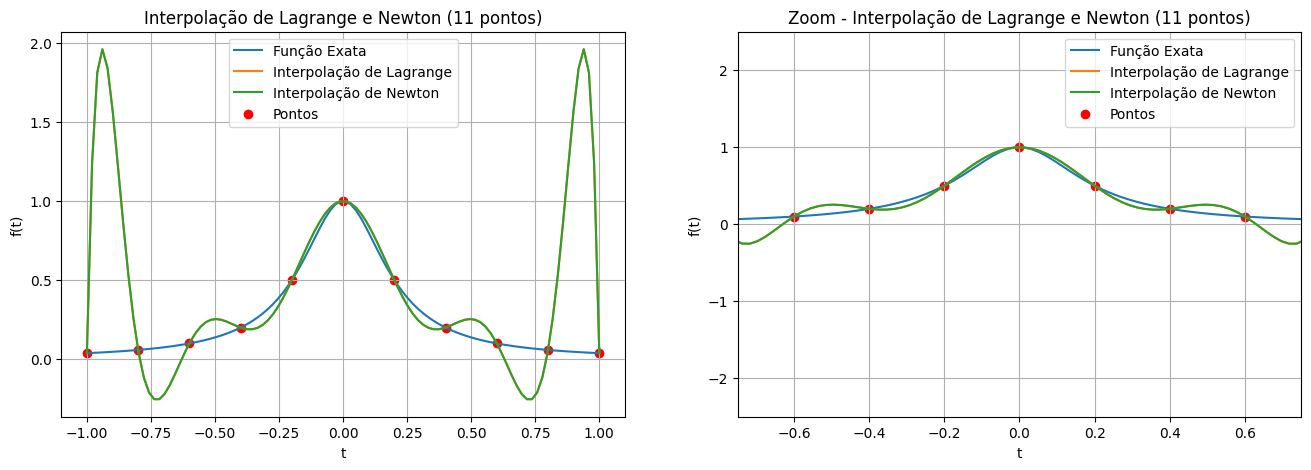

In [ ]:
ex2BC(11)

**c)** Repita o processo com $21$ pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.

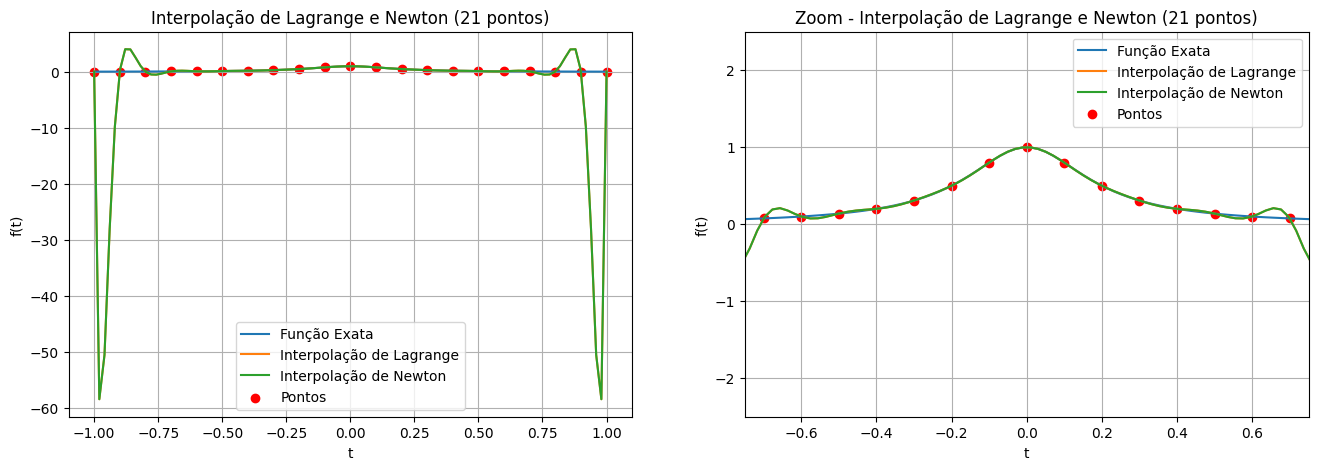

In [ ]:
ex2BC(21)

Podemos concluir que para a interpolação de Newton, um maior número de pontos garante uma maior semelhaça em relação a função original. Entretanto, a interlação de Lagrange obtem um resultado semelhante ou melhor utilizando menos pontos.

**d)** Usando a função `scipy.interpolate.interp1d` calcule a interpolação usando `_spline_linear` e `cúbica`. Exiba os gráficos e comente as diferenças das soluções deste item para os anteriores.

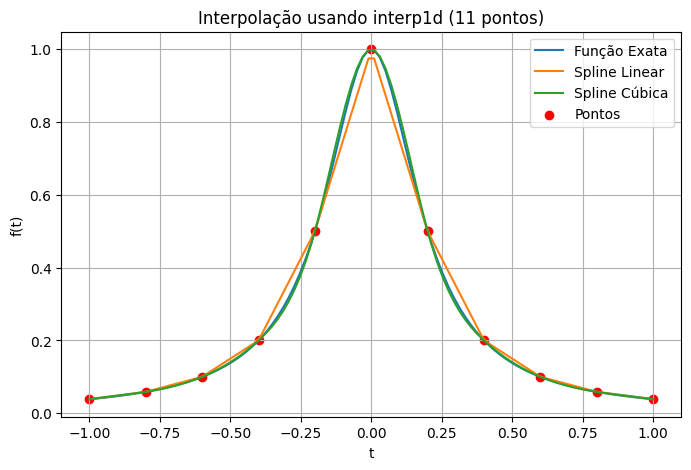

In [ ]:
# Número de pontos
n = 11

# Intervalo [-1, 1]
a, b = -1, 1

# Pontos igualmente espaçados
x = np.linspace(a, b, n)
y = f(x)

# Pontos para a interpolação
xi = np.linspace(a, b, 100)

# Interpolações
splineLinear = interp1d(x, y, kind='linear')
yiSplineLinear = splineLinear(xi)

splineCubic = interp1d(x, y, kind='cubic')
yiSplineCubic = splineCubic(xi)

# Plot dos resultado
plt.figure(figsize=(8, 5))
plt.plot(xi, f(xi), label='Função Exata')
plt.plot(xi, yiSplineLinear, label='Spline Linear')
plt.plot(xi, yiSplineCubic, label='Spline Cúbica')
plt.scatter(x, y, color='red', label='Pontos')
plt.legend()
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Interpolação usando interp1d (11 pontos)')
plt.grid(True)
plt.show()

A diferença fundamental entre a solução do item **(d)** em comparação aos itens **(b)** e **(c)** reside na técnica de interpoção utilizada.

\\
No caso **(b)** e **(c)**, foi feita uma interpolação polinomial por meio dos métodos de Lagrange e Newton. Esses métodos são baseados em construir estruturais polinomias sobre os pontos fornecidos. Entretando, eles podem sofrer com o fenômeno de Runge, que se trata da oscilação indesejada de polinômios de interpolação em pontos distante de pontos dados.

\\
No caso **(d)**, foi utilizada a interpolação por spline, que é uma abordagem baseada em funções suaves e segmentadas. As splines dividem o intervalo de interpolação em segmentos menores e constroem polinômios suaves em cada segmento. As splines lineares são polinômios de primeira ordem que possuem uma transição suave entre os segmentos adjacentes, enquanto as splines cúbicas são polinômios de terceira ordem que garantem suavidade tanto nas funções quanto nas derivadas.

\\
A principal diferença entre a interpolação por spline e a interpolação polinomial é que as splines proporcional uma interpoalação mais flexível e suave, assim reduzindo as oscilações indesejadas. Portanto, é esperado que o o item **(D)** favoreça resultados mais suaves e menos oscilantes, especialmente quando o número de pontos de dados é maio

**e)** Repita os itens **b)** e **c)** com nós de Chebyshev.

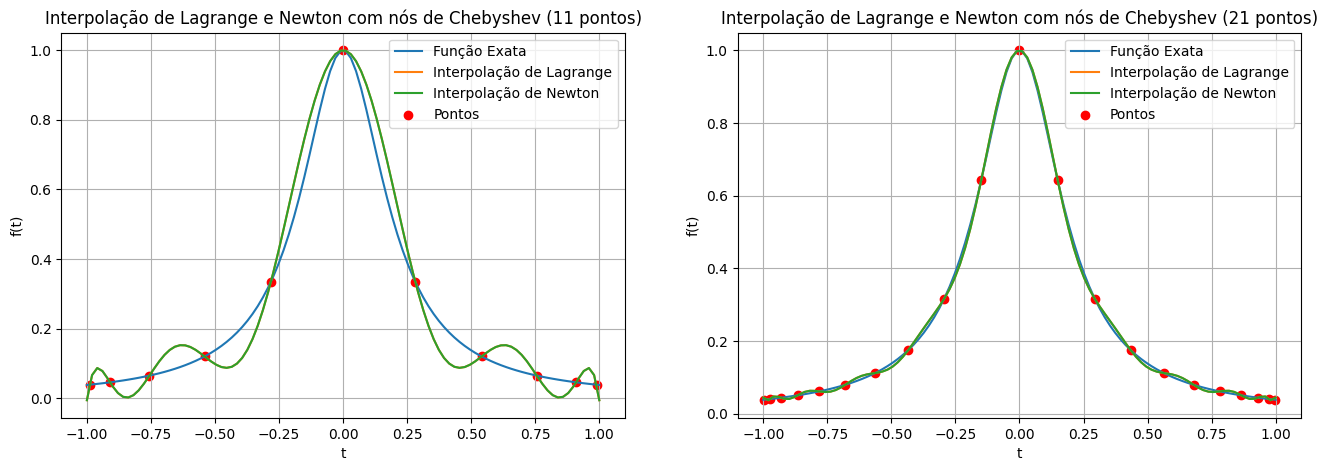

In [ ]:
plt.figure(figsize=(16, 5))

# i = ajuste para plotagem horizontal
for i, n in ([1, 11], [2, 21]):
  # Intervalo [-1, 1]
  a, b = -1, 1

  # Pontos de Chebyshev
  xChebyshev = np.polynomial.chebyshev.chebpts1(n)
  x = (b + a) / 2 + (b - a) / 2 * xChebyshev
  y = f(x)

  # Pontos para a interpolação
  xi = np.linspace(a, b, 100)

  # Interpolações
  yiLagrange = formaLagrange(x, y, xi)
  yiNewton = formaNewton(x, y, xi)

  # Plot dos resultados
  plt.subplot(1, 2, i)

  plt.plot(xi, f(xi), label='Função Exata')
  plt.plot(xi, yiLagrange, label='Interpolação de Lagrange')
  plt.plot(xi, yiNewton, label='Interpolação de Newton')
  plt.scatter(x, y, color='red', label='Pontos')
  plt.legend()
  plt.xlabel('t')
  plt.ylabel('f(t)')
  plt.title('Interpolação de Lagrange e Newton com nós de Chebyshev (%s pontos)' %n)
  plt.grid(True)


plt.show()

Podemos concluir que com a utilização de nós de Chebyshev fomos capazes de obter gráficos com um menor numéro de oscilações se comparado com a implementação sem sua utilização.

# **3. Mínimos Quadrados**

---

Vamos supor que os casos acumulados de Covid-19, no período inicial da pandemia, de 26 de fevereiro de 2020 a 18 de junho de 2020 são dados em _casosacumuladosbrasilatuaizado.txt_. O objetivo deste exercício é estudar o ajuste dos dados, no sentido dos mínimos quadrados, a uma função $g(x) = ab^x$, com $a, b ∈ \mathbb{R}$. Vamos utilizar os códigos implementados em aula:

In [ ]:
def mmq(x, y, k):
  X = np.vander(x, k)
  A = np.transpose(X).dot(X)
  b = np.transpose(X).dot(y)
  a = np.linalg.solve(A, b)

  return a

In [ ]:
def mmqQR(x, y, k):
  X = np.vander(x, k)
  Q, R = np.linalg.qr(X)
  b = np.transpose(Q).dot(y)
  a = np.linalg.solve(R, b)

  return a

In [ ]:
casos = np.loadtxt('/content/casosacumuladosbrasilatuaizado.txt', dtype='int')


**a)** Explique cada um dos códigos dados acima. O que está sendo calculado?

Os códigos acima, tanto o `mmq` quanto o `mmqQR`, calculam a regressão polinomial utilizando o método dos mínimos quadrados. Ademais,  a implementação `mmqQR` é uma extensão do primeiro código e inclui o método ponderado.


Para ambos os códigos, os parâmetros de entrada são:
1. `x` e `y` arrays que representam os pontos de dados de entrada;
2. `k` o grau do polinômio que será ajustado aos dados.

Assim, podemos descrever os passos dos códigos acima, começando pelo `mmq`:

1. Gerar a matriz de Vandermonde `X` usando a função `np.Vander`, que cria uma matriz com as potências de `x` de $0$ a $k-1$.
2. Calcula a matriz A como o produto do transposto de `X` com `X`.
3. Calcula o vetor `b` como o produto do transposto de `X` com `y`.
4. Usa a função `np.linalg.solve()` para resolver o sistema de equações lineares $Ax = b$ e obter o vetor a de coeficientes do polinômio ajustado.
5. Por fim, retorna o vetor `a` com os coeficientes do polinômio ajustado.

Ademais, temos o `mmqQR`:

1. Gerar a matriz de Vandermonde `X` usando a função `np.Vander`.
2. Calcula a decomposição $QR$ da matriz $X$ usando a função `np.linalg.qr()`, obtendo as matrizes ortogonais $Q$ e triangular superior $R$.
3. Calcula o vetor `b` como o produto do transposto de $Q$ com `y`.
4. Usa a função `np.linalg.solve()` para resolver o sistema de equações lineares $Ax = b$ e obter o vetor a de coeficientes do polinômio ajustado.
5. Por fim, retorna o vetor `a` com os coeficientes do polinômio ajustado.

**b)** Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma função $g(x) = ab^x$, com $a, b ∈ \mathbb{R}$. Use um dos códigos dados acima.

<h2><b>Aproximação pelos MMQ<b/><h2/>

---
Considerando a equação $g(x)=y=ab^x$, temos:

$$
\begin{aligned}
y &= a \cdot b^x
\\
 \log(y) &= log(a \cdot b^x)
\\
\log(y) &= log(a) + \log(b^x)
\\
\log(y) &= log(a) + x\log(b)
\end{aligned}
$$

\\
Realizando as substituições $\log(y) = Y$, $A = \log(a)$ e $\log(b)=B$, encontramos a seguinte reta:

$$
  Y = A + Bx
$$

Assim, encontrado os valores de $A$ e $B$, devemos retorná-los para sua forma original, tal que:

$$
\begin{aligned}
  A &= \log(a)
  \\
  e^A &= e^{\log{(a)}}
  \\
  e^A &= a
\end{aligned}
$$

Então, temos que $a = e^A$ e $b = e^B$.

a: 31.77484809447941 	 b: 1.1113520177397234


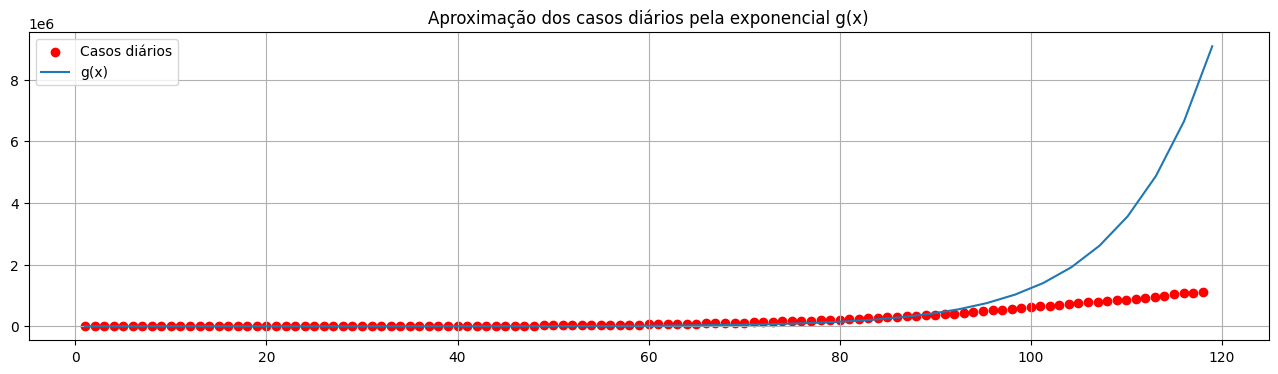

In [ ]:
def plotCovid(casos, ini):
  # Dados iniciais
  x = np.arange(ini, ini + len(casos))
  y = casos

  # Utilizando o Método dos MMQ para solucionar a equação
  B, A = mmq(x, np.log(y), 2)

  # Retornando A e B, para seus valores originais
  a = np.exp(A)
  b = np.exp(B)

  print('a: %s \t b: %s' %(a, b))

  # Função g(x) = ab^x
  g = lambda x : a * np.power(b, x)

  xi = np.linspace(ini, ini + len(casos), num=41, endpoint=True)

  plt.figure(figsize=(16, 4))
  plt.scatter(x, y, color='red', label='Casos diários')
  plt.title('Aproximação dos casos diários pela exponencial g(x)')
  plt.plot(xi, g(xi), label='g(x)')
  plt.legend()
  plt.grid(True)
  plt.show()

plotCovid(casos, 1)

**c)** Repita o ítem **b)** usando apenas os $20$ primeiros dias.

a: 0.4348862578863418 	 b: 1.3717182549417712


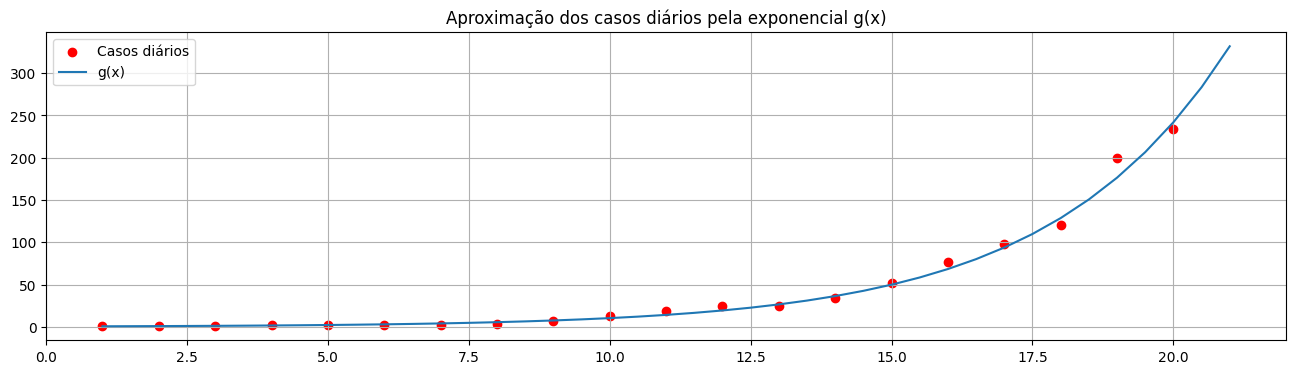

In [ ]:
plotCovid(casos[:20], 1)

**d)** Repita o ítem **b)** usando apenas os $50$ últimos dias.

a: 965.2680590496259 	 b: 1.055987374253855


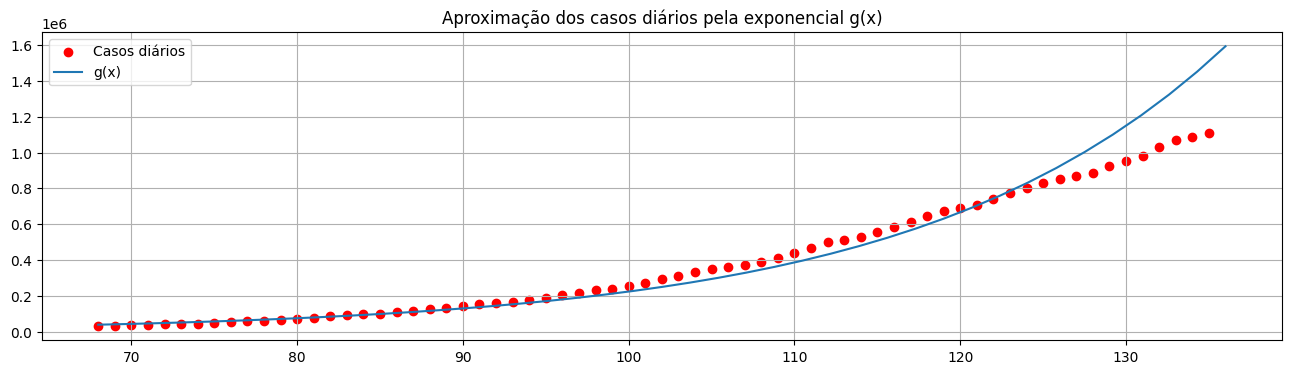

In [ ]:
plotCovid(casos[50:], len(casos)-50)

**e)** Compare os ítens **b)**, **c)** e **d)**. Que tipo de informação os dados nos fornecem?

A comparação entre os itens **b)**, **c)** e **d)** permite analisarmos como diferentes intervalos de dados podem influenciar o ajuste dos parâmentros $a$ e $b$. Os resultados obtidos nos mostram que com um menor intervalo de tempo, somos capazes de obter uma aproximação mais precisa em relação a um grande espaçamento de temporal.  